In [75]:
library(tidyverse)
library(lubridate)
library(forcats)
library(nycflights13)
library(haven)
library(gssr)
options(repr.plot.width=8, repr.plot.height=5, repl.plot.dpi=150)
theme_set(theme_classic())

# Lecture 14: Factors

In this lecture we will use the [General Social Survey](https://gss.norc.org) to ask questions about baby boomers and gen X/Y/Z. The book covers an example extract of this dataset called `gss_cat`. However, it is not up to date; in particular it does not include any data from people who were born after the year 2000 (i.e. almost everyone in this room except the professor). So to make it more relevant, we are going to load a more recent version of the data.

In [35]:
# remotes::install_github("kjhealy/gssr")
library(gssr)

Package loaded. To attach the GSS data, type data(gss_all) at the console.
For the codebook, type data(gss_doc).
For the panel data and documentation, type e.g. data(gss_panel08_long) and data(gss_panel_doc).



We will use the most recent (non-COVID) version of the survey:

In [122]:
# gss18 <- gss_get_yr("2018")  %>% 
#     select(age, race, sex, relig, relpast, sexbirth, sexnow, yearsusa, unhappy, educ, 
#            income, phone, tvhours) %>% mutate(across(-age, labelled::to_factor), age=as.integer(age))

# gss18.raw <- gss_get_yr("2018")  %>% 
#     select(age, race, sex, relig, relpast, sexbirth, sexnow, yearsusa, unhappy, educ, 
#            income, phone, tvhours) %>% mutate(across(everything(), as.integer))

# data(gss_doc)
# gss18.doc <- gss_doc %>% filter(id %in% colnames(gss18))


# save(gss18, gss18.raw, gss18.doc, file="gss18.RData")

This command has loaded two tables into your workspace: `gss18.raw` contains the raw data, and `gss18.doc` contains 
information about what each column in `gss18.raw` represents:

In [50]:
gss18.raw %>% print

# A tibble: 2,348 × 12
     age  race   sex relig relpast sexbirth sexnow yearsusa unhappy  educ income
   <int> <int> <int> <int>   <int>    <int>  <int>    <int>   <int> <int>  <int>
 1    43     1     1    11       5       NA     NA       NA      NA    14     NA
 2    74     1     2     2      NA        1      1       NA       1    10     12
 3    42     1     1     4       3        2      2       NA      NA    16     12
 4    63     1     2     1      NA        1      1       NA       2    16     NA
 5    71     2     1     2      NA        2      2       NA       1    18     NA
 6    67     1     2     2       4       NA     NA       NA      NA    16     NA
 7    59     2     2     1      NA       NA     NA       NA       2    13     10
 8    43     1     1     2      NA        2      2       NA       2    12     12
 9    62     1     2     4       4        1      1       NA      NA     8      5
10    55     1     1     1      NA        2      2       NA       4    12     12
# … w

In [19]:
gss18.doc %>% filter(id == "race")

id,description,properties,marginals,text
<chr>,<chr>,<list>,<list>,<chr>
race,Race of respondent,"Data type , Missing-data code, Record/column , numeric , 0 , 1/298 , RACE , RACE , RACE","80.3 , 14.2 , 5.5 , 100 , 52,033, 9,187 , 3,594 , 64,814, 1 , 2 , 3 , NA , WHITE , BLACK , OTHER , Total , RACE , RACE , RACE , RACE",24. What race do you consider yourself?


## Factors
Except for `age`, each of the columns in `gss18.raw` is a categorical random variable. (Recall that a random variable is *categorical* if it takes on one of a (small) number of discrete values.) In R we represent categorical variables using *factors*.

To learn the basics, we'll start with a simple example, and then switch back to the `gss` data:

In [116]:
birth_months = c("Jan", "Feb", "Sep", "Sep", "Dec", "Jan", "Jul", "Aug")  # categorical variable

The *possible* values of a categorical variable are called the *levels*. The levels of `birth_months` are `Jan`, `Feb`, ..., `Dec`. The *actual* values of `birth_months` are just called the values.

*Factors* are the traditional way to represent categorical data in R. To create a factor, we must specify the levels and the values:

In [117]:
birth_months_fac = factor(birth_months, levels=month.abb) %>% print

[1] Jan Feb Sep Sep Dec Jan Jul Aug
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


If you don't specify the levels, R will infer them based on all the observed values of the variable:

In [5]:
factor(birth_months) %>% str

 Factor w/ 6 levels "Aug","Dec","Feb",..: 4 3 6 6 2 4 5 1


It's best to be explicit about the factor levels. This way, if you there are typos or data entry errors, you will catch them more easily:

In [6]:
bad = c("Jan", "Feb", "Sep", "Ser", "Dec", "Jan", "Jul", "Aug")
#                               ^ note typo
# factor(bad)
factor(bad, levels=month.abb)

[1] Jan  Feb  Sep  <NA> Dec  Jan  Jul  Aug 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

### Order
One advantage of factors is that they can be ordered. This enables them to sort and plot in the way you would expect. Compare:

In [10]:
sort(birth_months)

[1] "Aug" "Dec" "Feb" "Jan" "Jan" "Jul" "Sep" "Sep"

In [16]:
sort(birth_months_fac)

[1] Jan Jan Feb Jul Aug Sep Sep Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

If you specify the factor levels using the `levels=` option, then that will specify the default order. If you do *not* specify the levels, then they will be sorted alphabetically by default:

In [17]:
levels(birth_months_fac)

[1] "Jan" "Feb" "Mar" "Apr" "May" "Jun" "Jul" "Aug" "Sep" "Oct" "Nov" "Dec"

In [18]:
levels(factor(birth_months))

[1] "Aug" "Dec" "Feb" "Jan" "Jul" "Sep"

Now, back to `gss18`. Let's focus on the `race` column:

In [21]:
gss18.raw %>% select(race)  %>% print

# A tibble: 2,348 × 1
    race
   <int>
 1     1
 2     1
 3     1
 4     1
 5     2
 6     1
 7     2
 8     1
 9     1
10     1
# … with 2,338 more rows


These data have been encoded for us into numbers. To get the coding scheme, we can consult the accompanying `gss18.doc` table:

In [23]:
gss18.doc %>% select(id, marginals) %>% filter(id == "race") %>% unnest

Warning message:
“`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(marginals)`.”


id,percent,n,value,label,id1
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
race,80.3,"52,033",1,WHITE,RACE
race,14.2,"9,187",2,BLACK,RACE
race,5.5,"3,594",3,OTHER,RACE
race,100.0,"64,814",NA,Total,RACE


Let's convert race in `gss18.raw` from an integer into a factor:

In [35]:
gss18.raw %>% mutate(race = factor(race, labels=c("white", "black", "other"))) %>% print

# A tibble: 2,348 × 11
     age race    sex relig relpast sexbirth sexnow yearsusa unhappy  educ income
   <int> <fct> <int> <int>   <int>    <int>  <int>    <int>   <int> <int>  <int>
 1    43 white     1    11       5       NA     NA       NA      NA    14     NA
 2    74 white     2     2      NA        1      1       NA       1    10     12
 3    42 white     1     4       3        2      2       NA      NA    16     12
 4    63 white     2     1      NA        1      1       NA       2    16     NA
 5    71 black     1     2      NA        2      2       NA       1    18     NA
 6    67 white     2     2       4       NA     NA       NA      NA    16     NA
 7    59 black     2     1      NA       NA     NA       NA       2    13     10
 8    43 white     1     2      NA        2      2       NA       2    12     12
 9    62 white     2     4       4        1      1       NA      NA     8      5
10    55 white     1     1      NA        2      2       NA       4    12     12
# … w

Notice that the order mattered -- R matched `white` with `1`, `black` with `2`, etc. If we had 
specified `labels=c("black", "white", "other")` it would have given us an incorrect factor.

Now let's do this for all ten other categorical variables in `gss18.raw`...

Just kidding! I did the work for you, and stored it in the table `gss18`:

In [36]:
print(gss18)

# A tibble: 2,348 × 11
     age race  sex    relig  relpast sexbi…¹ sexnow years…² unhappy educ  income
   <int> <fct> <fct>  <fct>  <fct>   <fct>   <fct>  <fct>   <fct>   <fct> <fct> 
 1    43 white male   chris… strong… NA      NA     NA      NA      14    NA    
 2    74 white female catho… NA      female  women  NA      never   10    $2500…
 3    42 white male   none   neithe… male    man    NA      NA      16    $2500…
 4    63 white female prote… NA      female  women  NA      rarely  16    NA    
 5    71 black male   catho… NA      male    man    NA      never   18    NA    
 6    67 white female catho… disagr… NA      NA     NA      NA      16    NA    
 7    59 black female prote… NA      NA      NA     NA      rarely  13    $1500…
 8    43 white male   catho… NA      male    man    NA      rarely  12    $2500…
 9    62 white female none   disagr… female  women  NA      NA      8     $5000…
10    55 white male   prote… NA      male    man    NA      often   12    $2500…
# … w

### The `forcats` package
`tidyverse` contains a package that has some tools for working with factors. Sometimes it is not automatically loaded by the `tidyverse` metapackage, in which case you must load it manually:

In [39]:
library(forcats) 

`forcats` commands are prefixed by `fct_` (compare `stringr`).

## Generations
Here are the ages of everybody in the dataset:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 7 rows containing non-finite values (`stat_bin()`).”


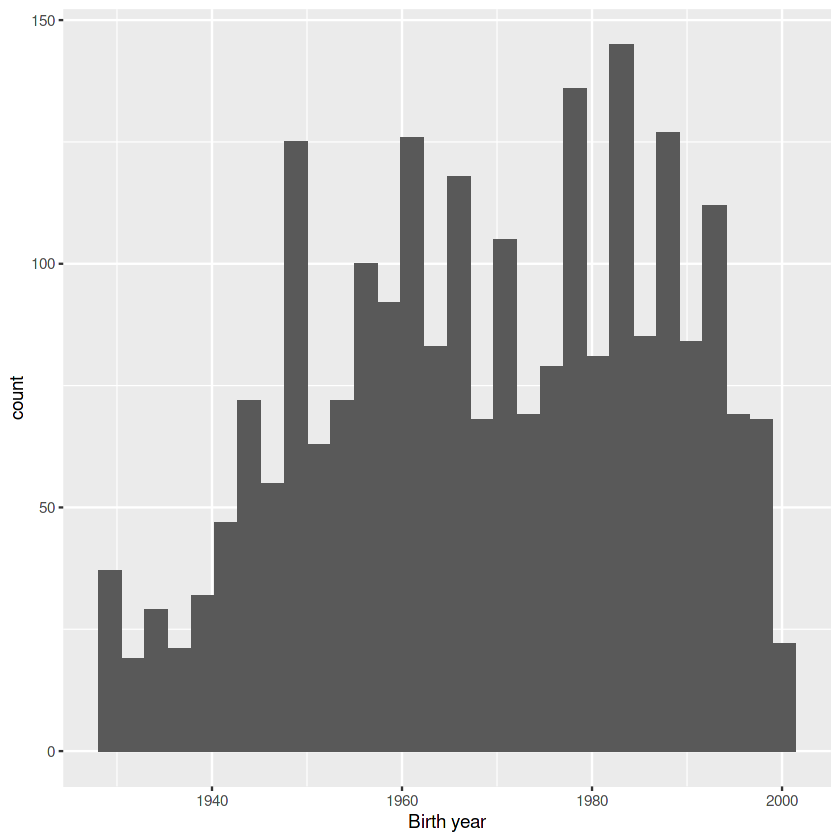

In [53]:
ggplot(gss18) + geom_histogram(aes(x=2018 - age)) + labs(x="Birth year")

Let's define the following generations
- [Silent generation](https://en.wikipedia.org/wiki/Silent_Generation): 1929&mdash;1945
- [Baby boomers](https://en.wikipedia.org/wiki/Baby_boomers): 1946&mdash;1964
- [Gen X](https://en.wikipedia.org/wiki/Generation_X): 1964&mdash;1981
- [Gen Y/Millennial](https://en.wikipedia.org/wiki/Millennials): 1982&mdash;1996
- [Gen Z](https://en.wikipedia.org/wiki/Generation_Z): 1997&mdash;20teens

In [67]:
# create a generations column in gss18
gss18.gen <- gss18 %>% 
    mutate(birth_year = 2018 - age,
        generation = cut(birth_year, breaks=c(1929, 1946, 1964, 1982, 1997, 2020), 
                                  labels = c("silent", "boomer", "x", "millennial", "z")
                                  ))

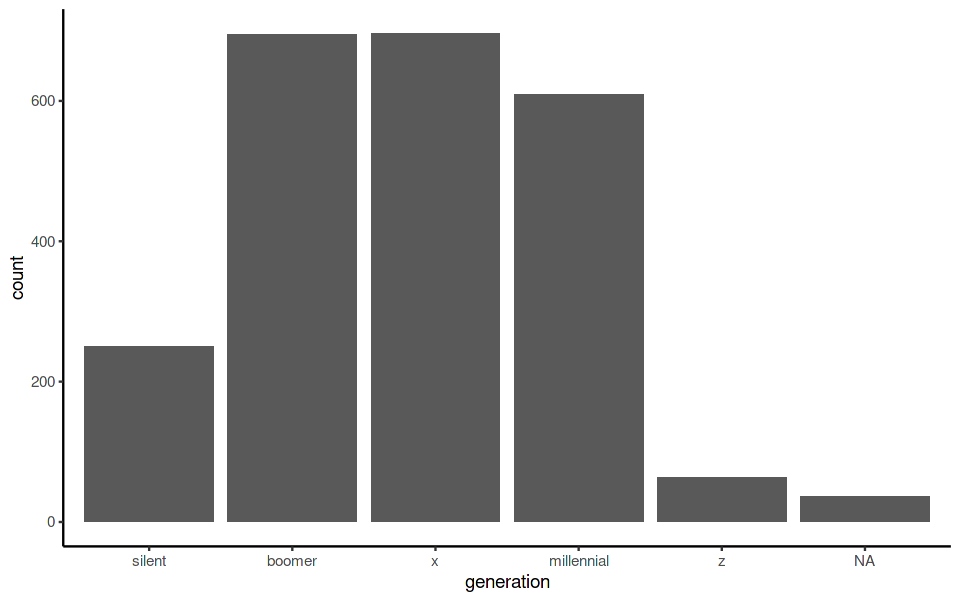

In [76]:
ggplot(gss18.gen) + geom_bar(aes(x=generation))

## Attitudes about religion
Here is the overall distribution of religious affiliation in the data:

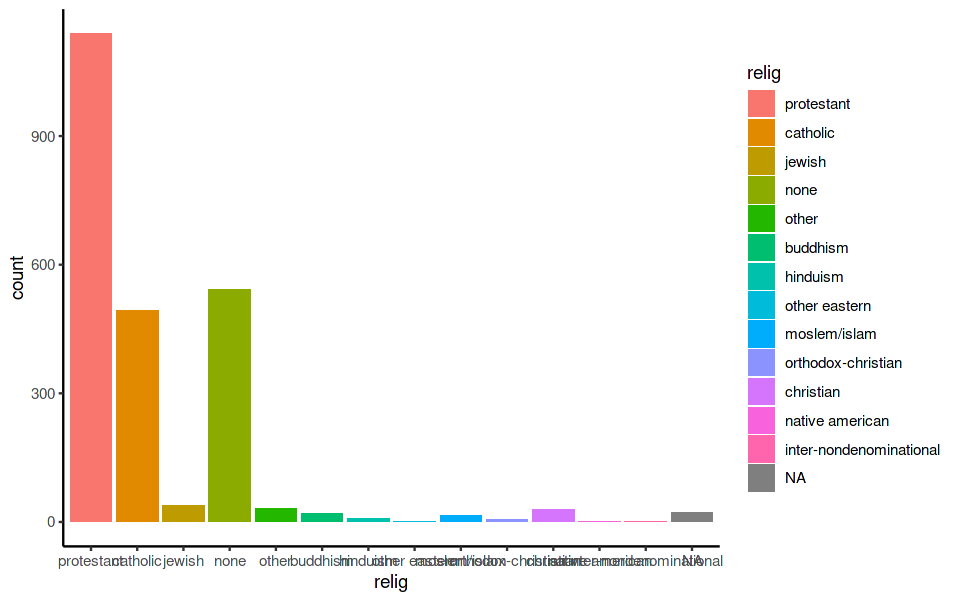

In [81]:
ggplot(gss18.gen) + geom_bar(aes(x=relig, fill=relig))

Let's think of ways to improve this jumbled plot. First, we can turn it sideways for better readability:

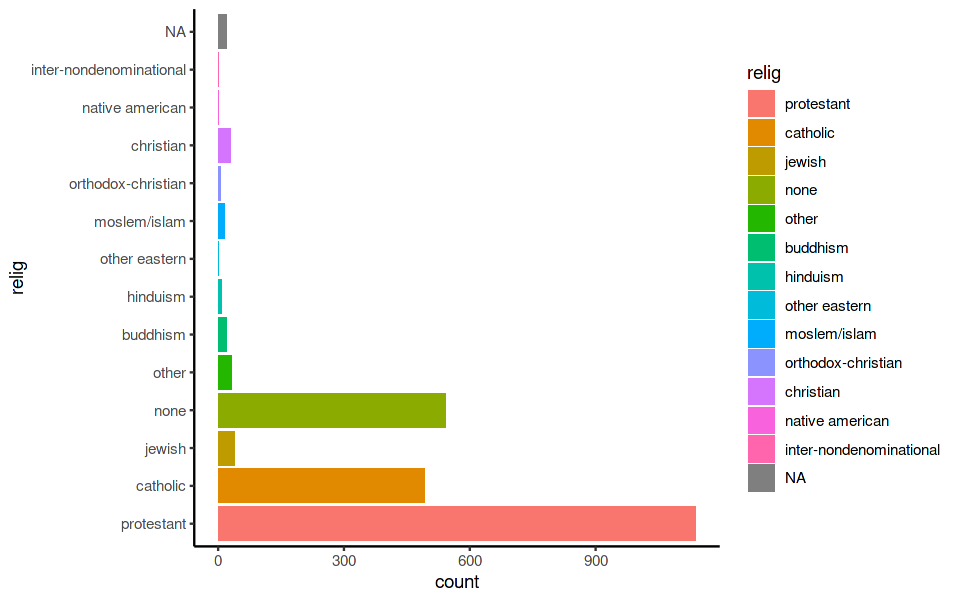

In [82]:
ggplot(gss18.gen) + geom_bar(aes(y=relig, fill=relig))

By default, the order of the labels shown by R corresponds to the order of the factor levels:

In [84]:
levels(gss18.gen$relig)

[1] "protestant"              "catholic"               
 [3] "jewish"                  "none"                   
 [5] "other"                   "buddhism"               
 [7] "hinduism"                "other eastern"          
 [9] "moslem/islam"            "orthodox-christian"     
[11] "christian"               "native american"        
[13] "inter-nondenominational"

To improve the appearance of the plot, we can use `fct_infreq` to reorder the levels such in increasing order of frequency:

In [85]:
gss18.gen$relig %>% fct_infreq %>% levels

[1] "protestant"              "none"                   
 [3] "catholic"                "jewish"                 
 [5] "other"                   "christian"              
 [7] "buddhism"                "moslem/islam"           
 [9] "hinduism"                "orthodox-christian"     
[11] "other eastern"           "native american"        
[13] "inter-nondenominational"

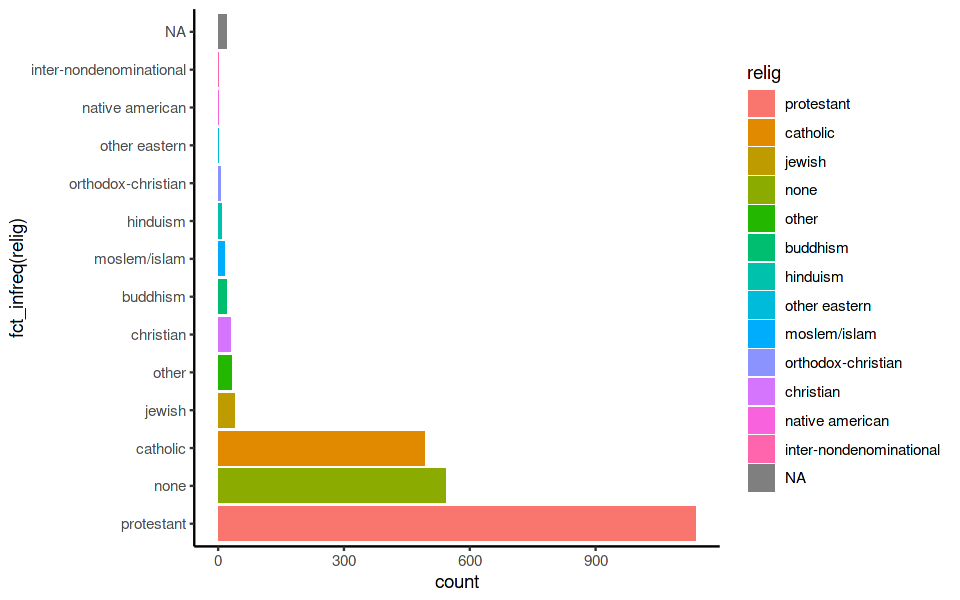

In [86]:
ggplot(gss18.gen) + geom_bar(aes(y=fct_infreq(relig), fill=relig))

We may also want to simplify the plot by grouping some factors together. The `fct_lump` command will combine uncommon factor levels into a new level, "other":

In [91]:
gss18.gen$relig %>% fct_lump %>% str

 Factor w/ 4 levels "protestant","catholic",..: 4 2 3 1 2 2 1 2 3 1 ...
 - attr(*, "label")= chr "r's religious preference"


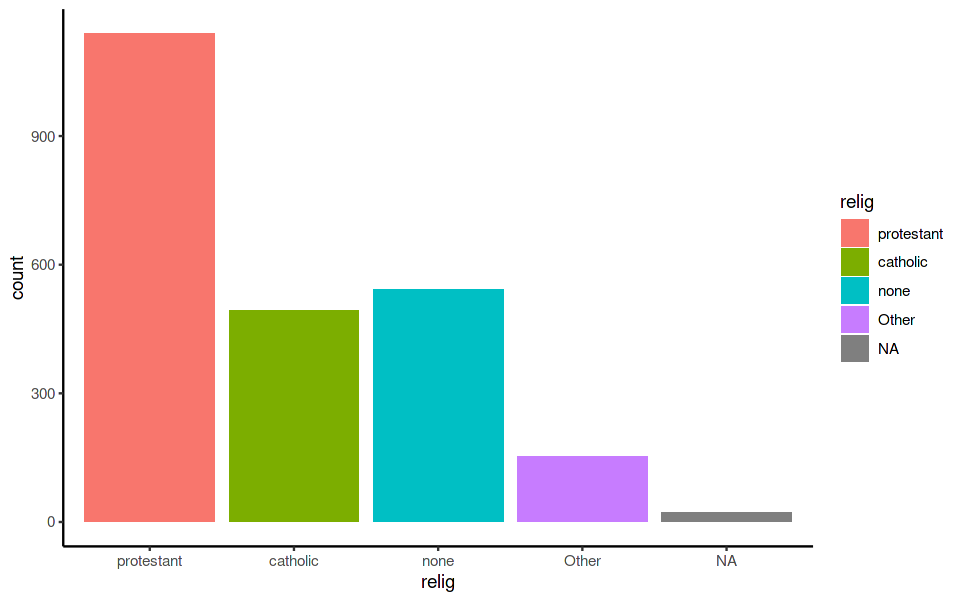

In [94]:
gss18.gen %>% mutate(relig=fct_lump(relig)) %>% ggplot() + geom_bar(aes(x=relig, fill=relig))

Be careful with this. Not everybody enjoys being lumped into the "Other" category. A good compromise in this case could be to use one bar for "Other", but still break everyone out in the legend:

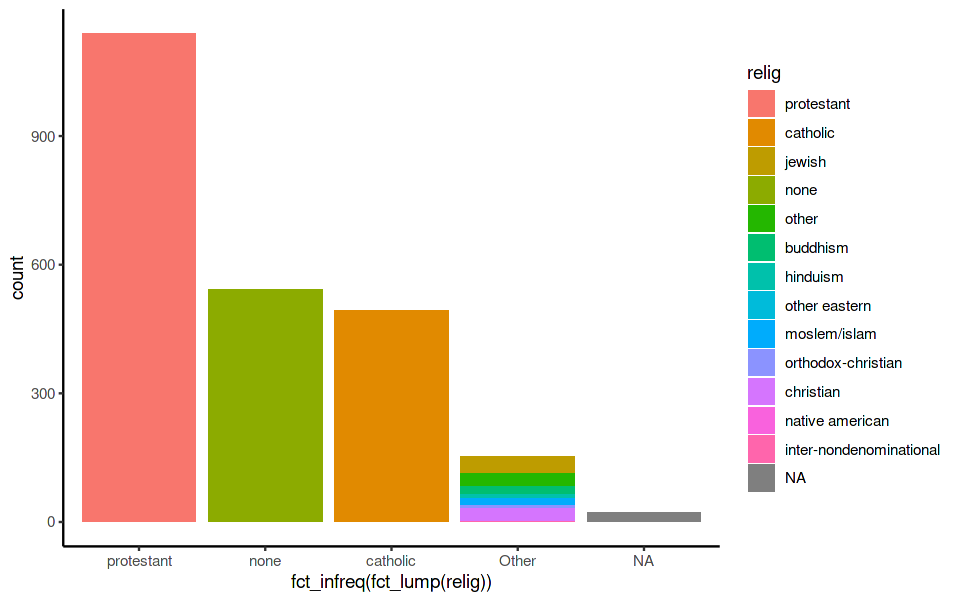

In [95]:
ggplot(gss18.gen) + geom_bar(aes(x=fct_infreq(fct_lump(relig)), fill=relig))

## Religious affiliation by generation
How does religious affiliation vary from one generation to the next? To study this, we will first use a simple table. The `table` command will take a dataframe containing two categorical columns and create a 2-way table of counts from them:

In [109]:
tbl <- gss18.gen %>% mutate(relig=fct_lump(relig)) %>% select(generation, relig) %>% table %>% print

            relig
generation   protestant catholic none Other
  silent            162       51   26    11
  boomer            371      159  114    42
  x                 332      155  157    45
  millennial        235      101  221    48
  z                  16       20   21     6


We probably want to normalize this table so that the data are expressed as percentages, with the rows summing to one:

In [110]:
tbl %>% prop.table(1) %>% round(2)

            relig
generation   protestant catholic none Other
  silent           0.65     0.20 0.10  0.04
  boomer           0.54     0.23 0.17  0.06
  x                0.48     0.22 0.23  0.07
  millennial       0.39     0.17 0.37  0.08
  z                0.25     0.32 0.33  0.10

Next, let's test whether religious affiliation and generational status are statistically independent. To do this, we'll perform a chi-squared test of independence, using `chisq.test()`:

In [118]:
chisq.test(tbl)

Warning message in chisq.test(tbl):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tbl
X-squared = 130.53, df = 12, p-value < 2.2e-16


There are several options for reordering factor levels. The first is `fct_reorder` which we have already seen. It reorders a factor based on the values of another continuous variable.

## Hours of TV watched
How does TV watching vary from generation to generation?

In [120]:
gss18.gen %>% ggplot(aes(x=generation, y=tvhour)) + geom_boxplot()

ERROR while rich displaying an object: Error in `geom_boxplot()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `FUN()`:
! object 'tvhour' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

## Example
Let's study the relationship between religion, age, and hours of TV watched in `gss_cat`:

In [30]:
# tvhours vs age

In [ ]:
# tvhours vs religion

In [ ]:
# age vs religion

In [14]:
head(relig_summary$relig)
head(fct_reorder(relig_summary$relig, relig_summary$tvhours))
# ggplot(relig_summary) + geom_point(aes(tvhours, fct_reorder(relig, tvhours)))

[1] No answer               Don't know              Inter-nondenominational
[4] Native american         Christian               Orthodox-christian     
16 Levels: No answer Don't know Inter-nondenominational ... Not applicable

[1] No answer               Don't know              Inter-nondenominational
[4] Native american         Christian               Orthodox-christian     
16 Levels: Other eastern Hinduism Buddhism Orthodox-christian ... Not applicable

Let's try visualizing income by age:

In [15]:
rincome_summary = gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  ) %>% print

# A tibble: 16 x 4
   rincome          age tvhours     n
   <fct>          <dbl>   <dbl> <int>
 1 No answer       45.5    2.90   183
 2 Don't know      45.6    3.41   267
 3 Refused         47.6    2.48   975
 4 $25000 or more  44.2    2.23  7363
 5 $20000 - 24999  41.5    2.78  1283
 6 $15000 - 19999  40.0    2.91  1048
 7 $10000 - 14999  41.1    3.02  1168
 8 $8000 to 9999   41.1    3.15   340
 9 $7000 to 7999   38.2    2.65   188
10 $6000 to 6999   40.3    3.17   215
11 $5000 to 5999   37.8    3.16   227
12 $4000 to 4999   38.9    3.15   226
13 $3000 to 3999   37.8    3.31   276
14 $1000 to 2999   34.5    3.00   395
15 Lt $1000        40.5    3.36   286
16 Not applicable  56.1    3.79  7043


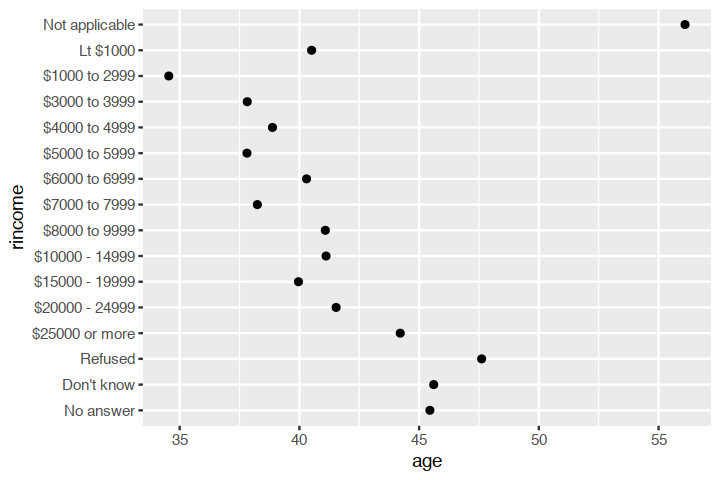

In [16]:
ggplot(rincome_summary) + geom_point(aes(age, rincome))

The plot may look visually appealing but the $y$-axis is totally jumbled! This shows that we only use `fct_reorder` in cases where there is not already a natural order. 

Nevertheless, there are a few categories that can be sensibly broken out: `No answer`, `Not applicable`, `Don't Know` and `Refused`. The command `fct_relevel(f, lvls)` takes a factor `f` and returns a new factor which has the vector `lvls` of factor levels placed at the front:

In [17]:
rincome_summary$rincome
fct_relevel(rincome_summary$rincome, 'Not applicable')

 [1] No answer      Don't know     Refused        $25000 or more $20000 - 24999
 [6] $15000 - 19999 $10000 - 14999 $8000 to 9999  $7000 to 7999  $6000 to 6999 
[11] $5000 to 5999  $4000 to 4999  $3000 to 3999  $1000 to 2999  Lt $1000      
[16] Not applicable
16 Levels: No answer Don't know Refused $25000 or more ... Not applicable

 [1] No answer      Don't know     Refused        $25000 or more $20000 - 24999
 [6] $15000 - 19999 $10000 - 14999 $8000 to 9999  $7000 to 7999  $6000 to 6999 
[11] $5000 to 5999  $4000 to 4999  $3000 to 3999  $1000 to 2999  Lt $1000      
[16] Not applicable
16 Levels: Not applicable No answer Don't know Refused ... Lt $1000

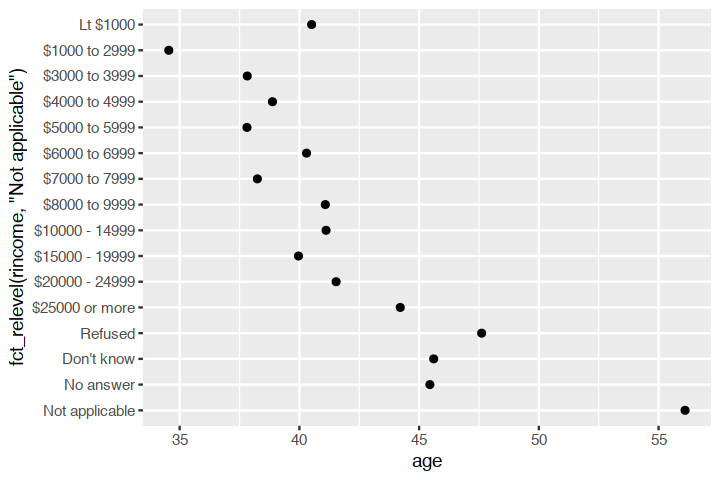

In [18]:
ggplot(rincome_summary) + geom_point(aes(age, fct_relevel(rincome, 'Not applicable')))

Finally we have a couple of other useful commands. `fct_infreq(f)` will reorder the levels in `f` increasing frequency. This is useful with `geom_bar`:

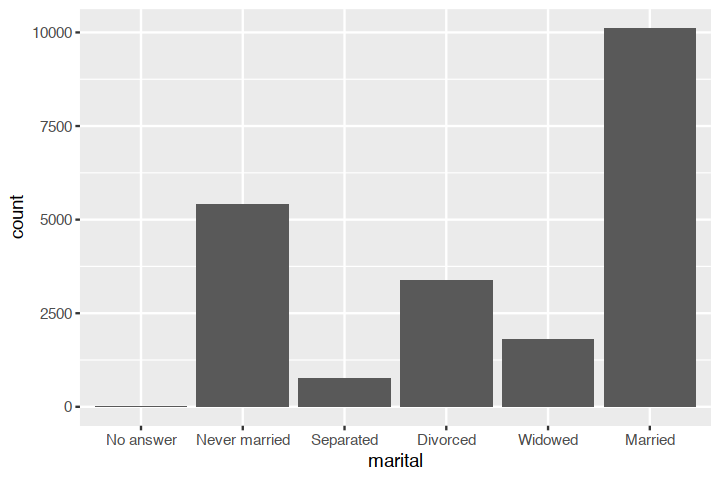

In [19]:
ggplot(gss_cat, aes(marital)) + geom_bar()

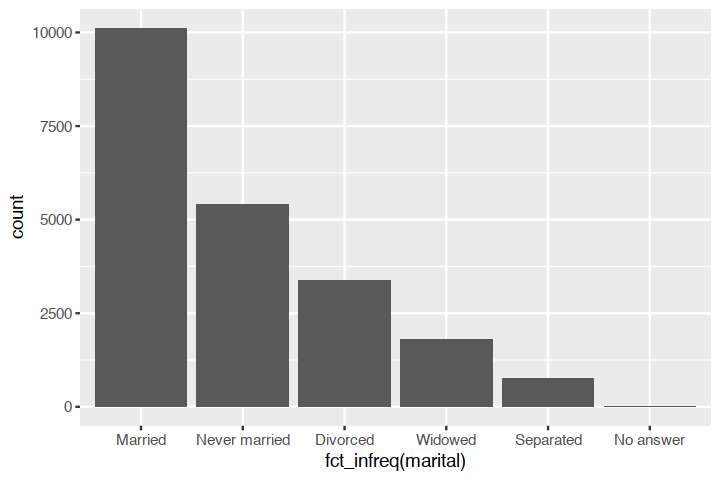

In [20]:
ggplot(gss_cat, aes(fct_infreq(marital))) + geom_bar()

`fct_rev` will reverse the order of a factor:

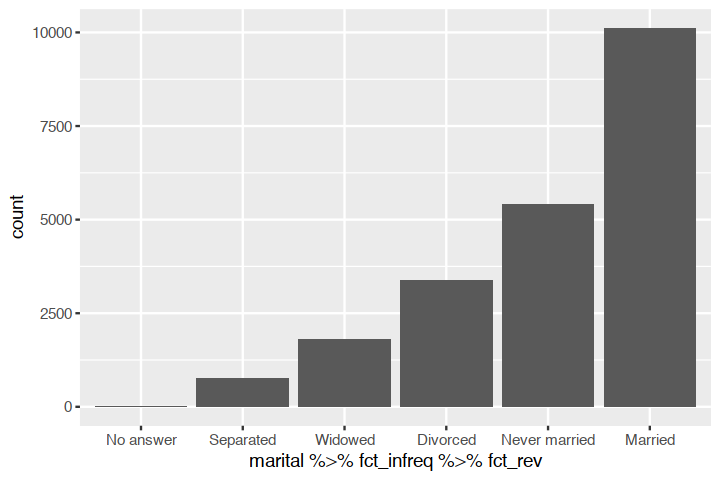

In [21]:
ggplot(gss_cat, aes(marital %>% fct_infreq %>% fct_rev)) + geom_bar()

### Altering levels
In many cases it is necessary to change the *values* of a factor, especially when generating plots and tables for publications. 

In [22]:
count(gss_cat, partyid)

   partyid            n   
1  No answer           154
2  Don't know            1
3  Other party         393
4  Strong republican  2314
5  Not str republican 3032
6  Ind,near rep       1791
7  Independent        4119
8  Ind,near dem       2499
9  Not str democrat   3690
10 Strong democrat    3490

The `fct_recode` command makes this easy. This command takes a factor and a set of `new_level=old_level` options:

In [23]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near republican" = "Ind,near rep",
    "Independent, near democrat" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat"
  )) %>%
  mutate(partyid_int = as.integer(partyid)) %>% select(partyid, partyid_int) %>% print
  # count(partyid)

# A tibble: 21,483 x 2
   partyid                      partyid_int
   <fct>                              <int>
 1 Independent, near republican           6
 2 Republican, weak                       5
 3 Independent                            7
 4 Independent, near republican           6
 5 Democrat, weak                         9
 6 Democrat, strong                      10
 7 Republican, weak                       5
 8 Independent, near democrat             8
 9 Democrat, weak                         9
10 Republican, strong                     4
# … with 21,473 more rows


A useful feature of `fct_recode` is for combining multiple factors into one:

In [24]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican"            = "Strong republican",
    "Republican"            = "Not str republican",
    "Independent"           = "Ind,near rep",
    "Independent"           = "Ind,near dem",
    "Democrat"              = "Not str democrat",
    "Democrat"              = "Strong democrat",
    "Other"                 = "No answer",
    "Other"                 = "Don't know",
    "Other"                 = "Other party"
  )) %>%
  count(partyid)

  partyid     n   
1 Other        548
2 Republican  5346
3 Independent 8409
4 Democrat    7180

If there are many levels this gets repetitious, so we have an additional command called `fct_collapse` which is specifically designed to handle this case:

In [25]:
gss_cat %>%
  mutate(partyid = fct_collapse(partyid,
    Other = c("No answer", "Don't know", "Other party"),
    Republican = c("Strong republican", "Not str republican"),
    Independent = c("Ind,near rep", "Independent", "Ind,near dem"),
    Democrat = c("Not str democrat", "Strong democrat")
  )) %>%
  count(partyid)

  partyid     n   
1 Other        548
2 Republican  5346
3 Independent 8409
4 Democrat    7180

### Exercise
What is the relationship between party affiliation and:

- Age
- Hours of TV watched per week
- Income

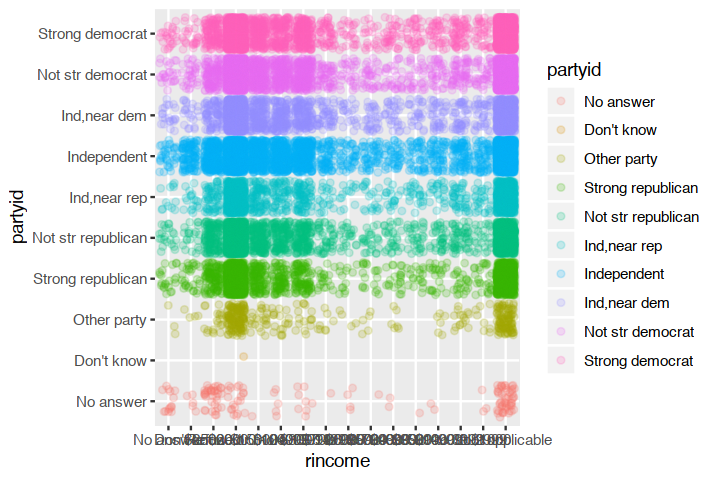

In [26]:
gss_cat %>%
 ggplot + geom_jitter(aes(x=rincome, y=partyid, color=partyid), 
                      alpha=.2) 

### Questions
A *millennial* is someone who was born between 1982 and 2000 (inclusive, say). A *baby boomer* is someone who was born from 1946-1964. 

- How many boomers are there in `gss_cat` versus millennials?
- Compared to baby boomers, are millennials:
  - More or less religious?
  - More or less liberal?
  - More or less fans of watching TV?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 76 rows containing non-finite values (`stat_bin()`).”


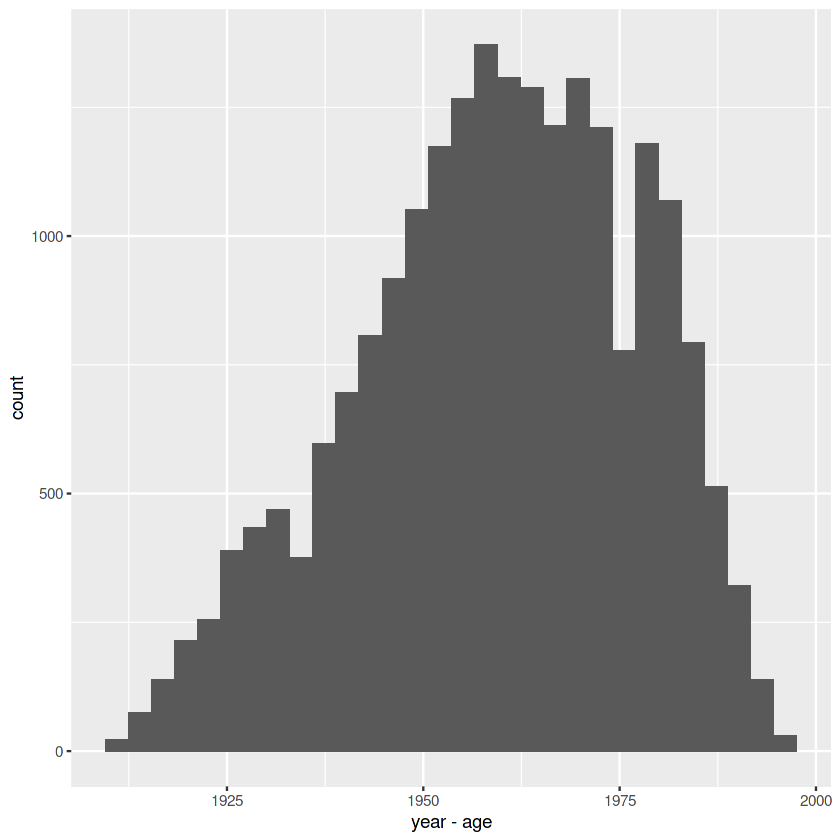

In [33]:
ggplot(gss_cat) + geom_histogram(aes(x = year - age))

In [27]:
tbl <- gss_cat %>% mutate(birth_year = year - age,
                   age_category = cut(birth_year,
                   breaks = c(0, 1946, 1964, 1982, 2000),
                   labels = c("neither", "boomer", "neither",
                              "millennial"))) %>% 
    mutate(no_religion = relig == "None") %>%
    filter(age_category %in% c("boomer", "millennial"))


lm(tvhours ~ age_category, data = tbl) %>% summary

# table(tbl$age_category, tbl$no_religion)

# prop.test(x = c(1077, 525), n = c(6343 + 1077, 1272 + 525))




Call:
lm(formula = tvhours ~ age_category, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0008 -1.7991 -0.7991  0.9992 21.2009 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.00078    0.04370  68.674   <2e-16 ***
age_categorymillennial -0.20168    0.09257  -2.179   0.0294 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.713 on 4957 degrees of freedom
  (4258 observations deleted due to missingness)
Multiple R-squared:  0.0009567,	Adjusted R-squared:  0.0007552 
F-statistic: 4.747 on 1 and 4957 DF,  p-value: 0.02939


In [28]:
 <- 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:2: unexpected assignment
1:  <-
     ^
